# Grafica de funciones de dominio en el plano complejo y llegada en el plano complejo

## Método 1: graficas Im - Re 

In [1]:
# Empezamos por importar las librerias que permitan trabajar con numeros complejos y graficas y operaciones matematicas avanzadas
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from sympy import *

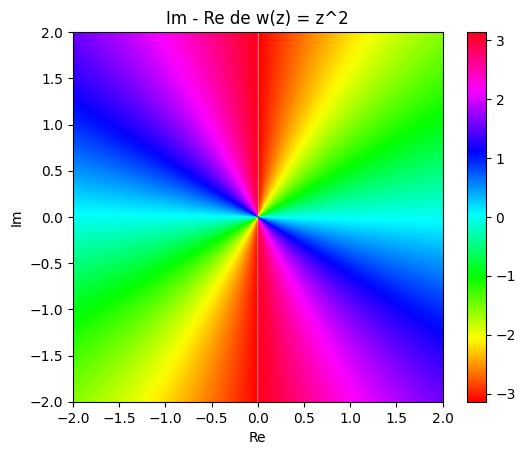

In [7]:
# grafica Im - Re de la funcion w(z) = z^2
def grafica_imre():
    # Definimos los valores de x e y
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    W = Z**2
    # Graficamos la funcion
    plt.figure()
    plt.imshow(np.angle(W), extent=(x.min(), x.max(), y.min(), y.max()), cmap='hsv')
    plt.colorbar()
    plt.title('Im - Re de w(z) = z^2')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()
    
# probar el codigo
grafica_imre()

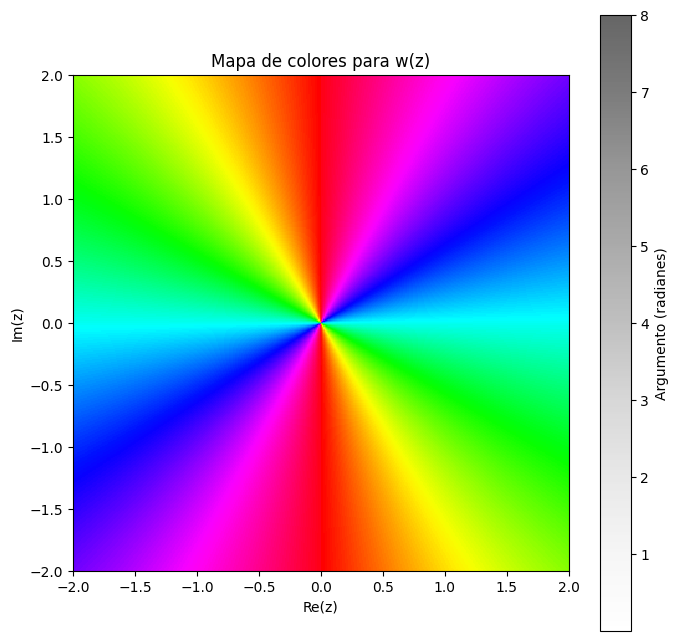

In [13]:
# Definimos el dominio
x = np.linspace(-2, 2, 400)  # Parte real
y = np.linspace(-2, 2, 400)  # Parte imaginaria
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Dominio complejo

# Definimos la función que usaremos para ser llamada con distintas funciones
def w(z):
    return z**2

W = w(Z)

# Calcular módulo y argumento
modulo = np.abs(W)
argumento = np.angle(W)

# Graficar
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, argumento, cmap='hsv', shading='auto')  # Tono para argumento
plt.imshow(modulo, extent=(-2, 2, -2, 2), cmap='Greys', alpha=0.6)  # Brillo para módulo
plt.colorbar(label='Argumento (radianes)')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Mapa de colores para w(z)')
plt.show()


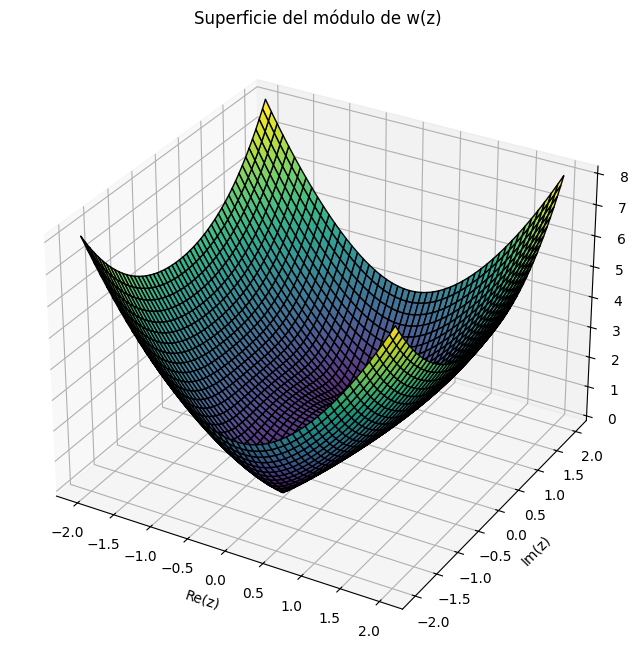

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Graficar el módulo en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, np.abs(W), cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('|w(z)|')
ax.set_title('Superficie del módulo de w(z)')
plt.show()


In [ ]:
## Método 2. diagrama de flujo

# Definimos el dominio
x = np.linspace(-2, 2, 400)  # Parte real
y = np.linspace(-2, 2, 400)  # Parte imaginaria
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Dominio complejo

# Definimos la función que usaremos para ser llamada con distintas funciones
def salida(z):
    parte_real = z.real
    parte_imaginaria = z.imag
    return parte_real**2 - parte_imaginaria**2, 2*parte_real*parte_imaginaria

U, V = salida(Z)
func = salida(Z)[0]

plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, U, V, color=np.log(1+np.abs(func)), cmap='plasma')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Flujo del campo asociado a w(z)')
plt.colorbar(label='log(|w(z)|)')
plt.show()


AttributeError: module 'numpy.exceptions' has no attribute '_raise_ifnan'

# Transformada de Fourier

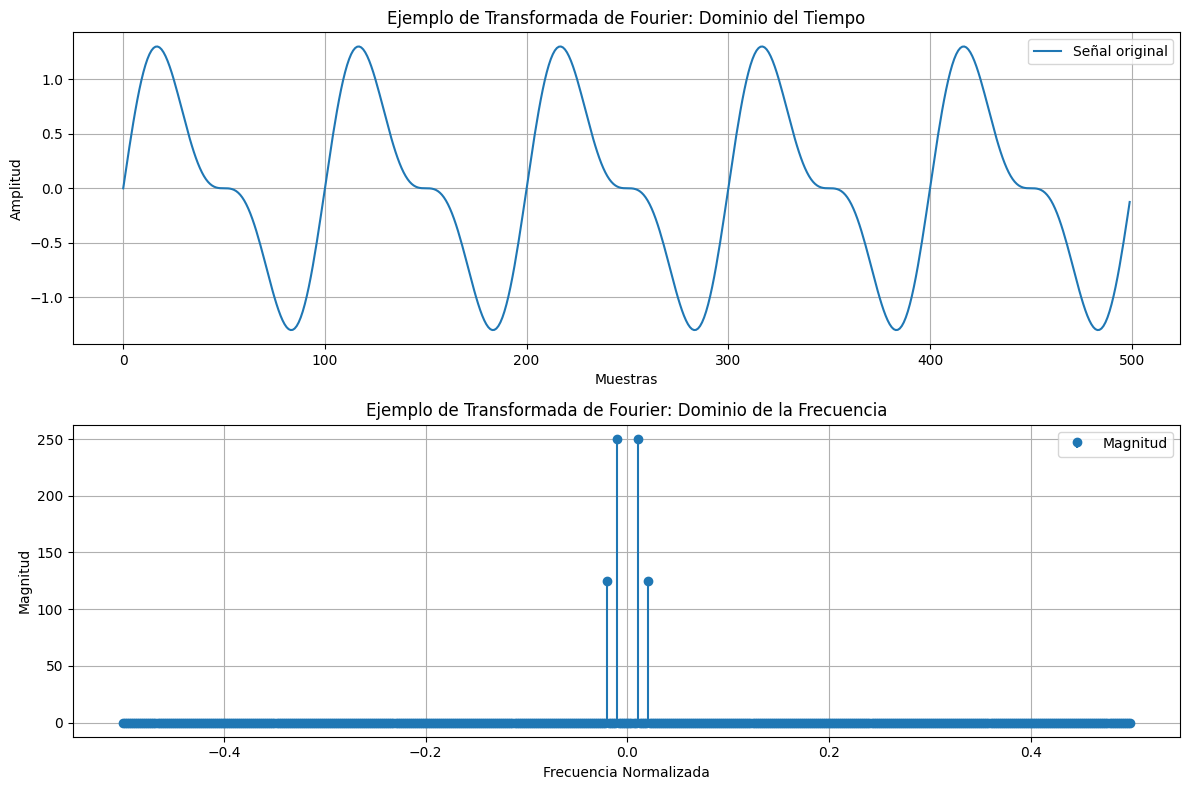

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la Transformada de Fourier usando numpy
def fourier_transform(signal):
    """
    Calcula la Transformada de Fourier de una señal discreta.
    
    Args:
        signal (list or numpy array): Señal discreta en el dominio del tiempo.
    
    Returns:
        numpy array: Transformada de Fourier de la señal.
    """
    return np.fft.fft(signal)

# Función para calcular la Transformada Inversa de Fourier
def inverse_fourier_transform(frequency_domain_signal):
    """
    Calcula la Transformada Inversa de Fourier.
    
    Args:
        frequency_domain_signal (numpy array): Señal en el dominio de la frecuencia.
    
    Returns:
        numpy array: Señal en el dominio del tiempo.
    """
    return np.fft.ifft(frequency_domain_signal)

# Función para visualizar señales y sus transformadas
def plot_signals(time_signal, frequency_signal, title="Transformada de Fourier"):
    """
    Muestra la señal en el dominio del tiempo y la transformada en el dominio de la frecuencia.
    
    Args:
        time_signal (numpy array): Señal en el dominio del tiempo.
        frequency_signal (numpy array): Transformada de Fourier en el dominio de la frecuencia.
        title (str): Título de la gráfica.
    """
    N = len(time_signal)
    freqs = np.fft.fftfreq(N)

    plt.figure(figsize=(12, 8))

    # Señal en el dominio del tiempo
    plt.subplot(2, 1, 1)
    plt.plot(range(N), time_signal, label="Señal original")
    plt.title(f"{title}: Dominio del Tiempo")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()

    # Magnitud de la Transformada de Fourier
    plt.subplot(2, 1, 2)
    plt.stem(freqs, np.abs(frequency_signal), basefmt=" ", label="Magnitud")
    plt.title(f"{title}: Dominio de la Frecuencia")
    plt.xlabel("Frecuencia Normalizada")
    plt.ylabel("Magnitud")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Crear una señal discreta (suma de dos senoidales)
    t = np.linspace(0, 1, 500, endpoint=False)
    signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

    # Calcular la Transformada de Fourier
    transformed_signal = fourier_transform(signal)

    # Mostrar la señal original y su transformada
    plot_signals(signal, transformed_signal, title="Ejemplo de Transformada de Fourier")



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar
def plot_complex_operations(time_signal, frequency_signal, title="Relación Input-Output"):
    """
    Muestra la señal en el dominio del tiempo (real e imaginaria)
    y su transformada en el dominio de la frecuencia.
    """
    N = len(time_signal)
    freqs = np.fft.fftfreq(N)

    plt.figure(figsize=(14, 10))

    # Dominio del tiempo
    plt.subplot(2, 2, 1)
    plt.plot(range(N), time_signal.real, label="Parte real")
    plt.plot(range(N), time_signal.imag, label="Parte imaginaria", linestyle="--")
    plt.title(f"{title}: Dominio del Tiempo")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.legend()

    # Magnitud del dominio de la frecuencia
    plt.subplot(2, 2, 2)
    plt.stem(freqs, np.abs(frequency_signal), basefmt=" ", label="Magnitud")
    plt.title(f"{title}: Magnitud en Frecuencia")
    plt.xlabel("Frecuencia Normalizada")
    plt.ylabel("Magnitud")
    plt.grid()
    plt.legend()

    # Fase del dominio de la frecuencia
    plt.subplot(2, 2, 3)
    plt.stem(freqs, np.angle(frequency_signal), basefmt=" ", label="Fase")
    plt.title(f"{title}: Fase en Frecuencia")
    plt.xlabel("Frecuencia Normalizada")
    plt.ylabel("Fase (radianes)")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


In [22]:
# Configuración inicial: señal compleja
N = 64
t = np.arange(N)
original_signal = np.exp(1j * 2 * np.pi * 5 * t / N)  # Senoide compleja de frecuencia 5/N

# Transformada de Fourier de la señal original
original_fft = np.fft.fft(original_signal)

# Operaciones básicas con números complejos
# 1. Conjugado
conjugated_signal = np.conjugate(original_signal)
conjugated_fft = np.fft.fft(conjugated_signal)

# 2. Multiplicación por un factor complejo
complex_factor = np.exp(1j * np.pi / 4)  # Rotación en 45 grados
scaled_signal = complex_factor * original_signal
scaled_fft = np.fft.fft(scaled_signal)

# 3. Desplazamiento en el tiempo
shifted_signal = np.roll(original_signal, 10)  # Desplazamiento cíclico
shifted_fft = np.fft.fft(shifted_signal)

# 4. Combinación lineal (suma con otra senoide compleja)
secondary_signal = np.exp(1j * 2 * np.pi * 10 * t / N)  # Frecuencia diferente
combined_signal = original_signal + secondary_signal
combined_fft = np.fft.fft(combined_signal)

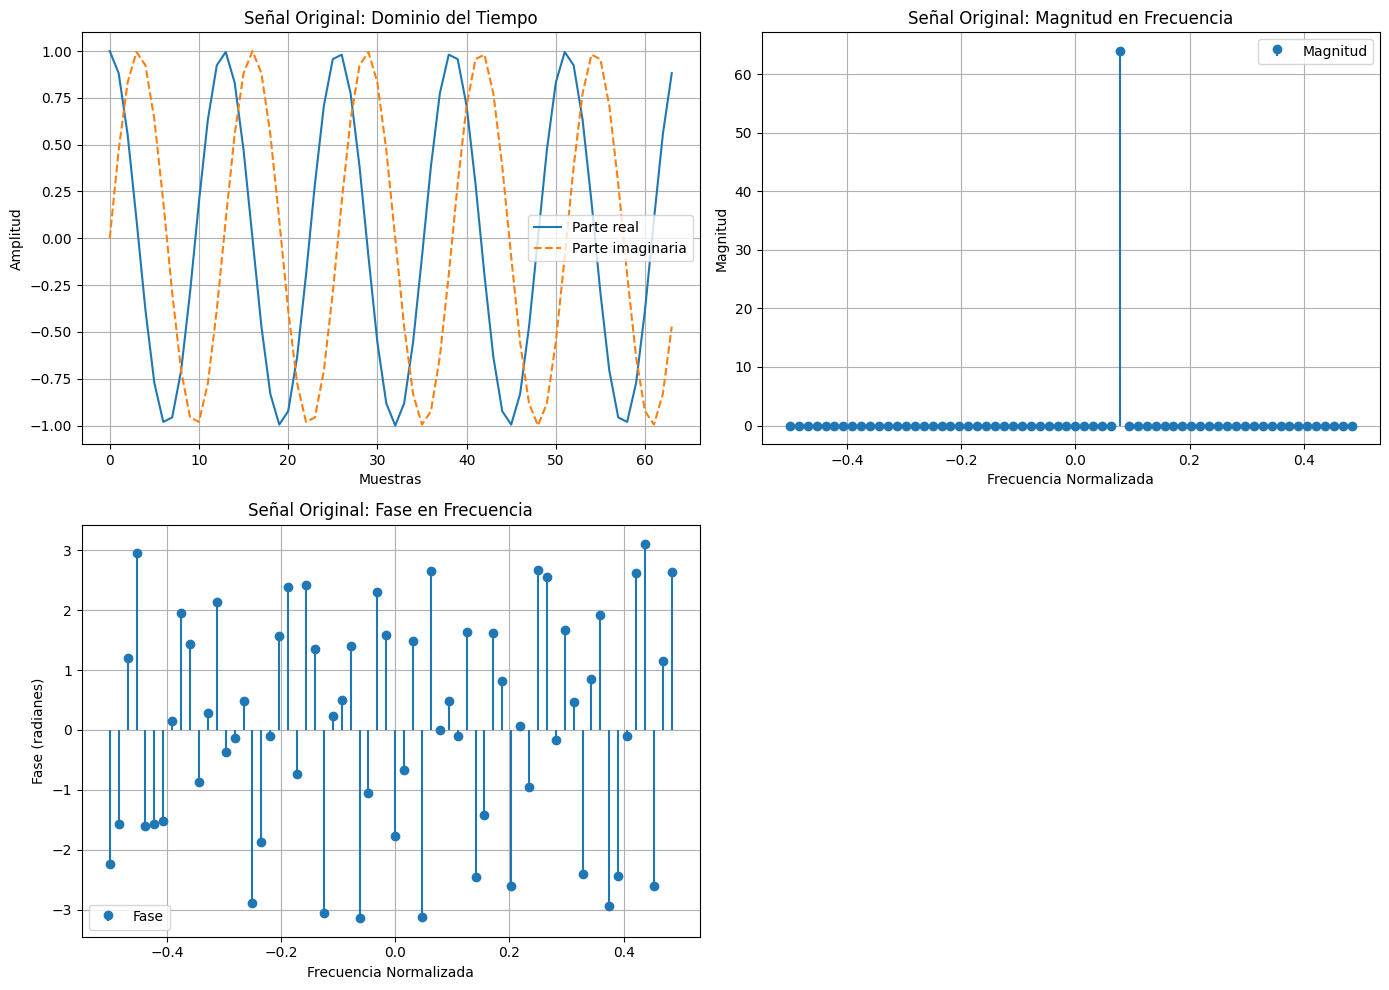

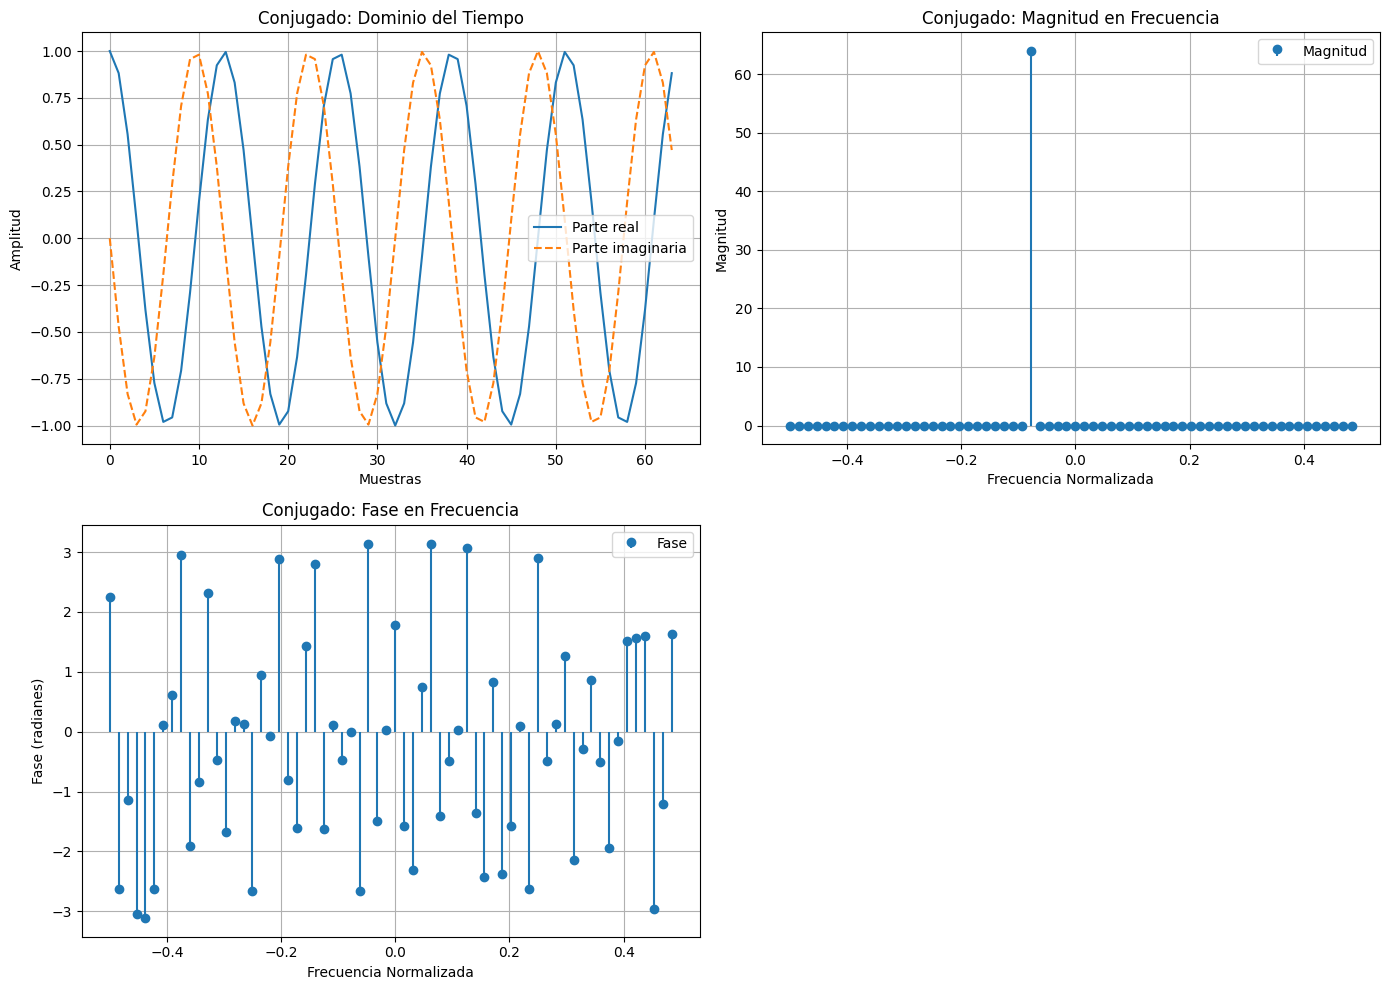

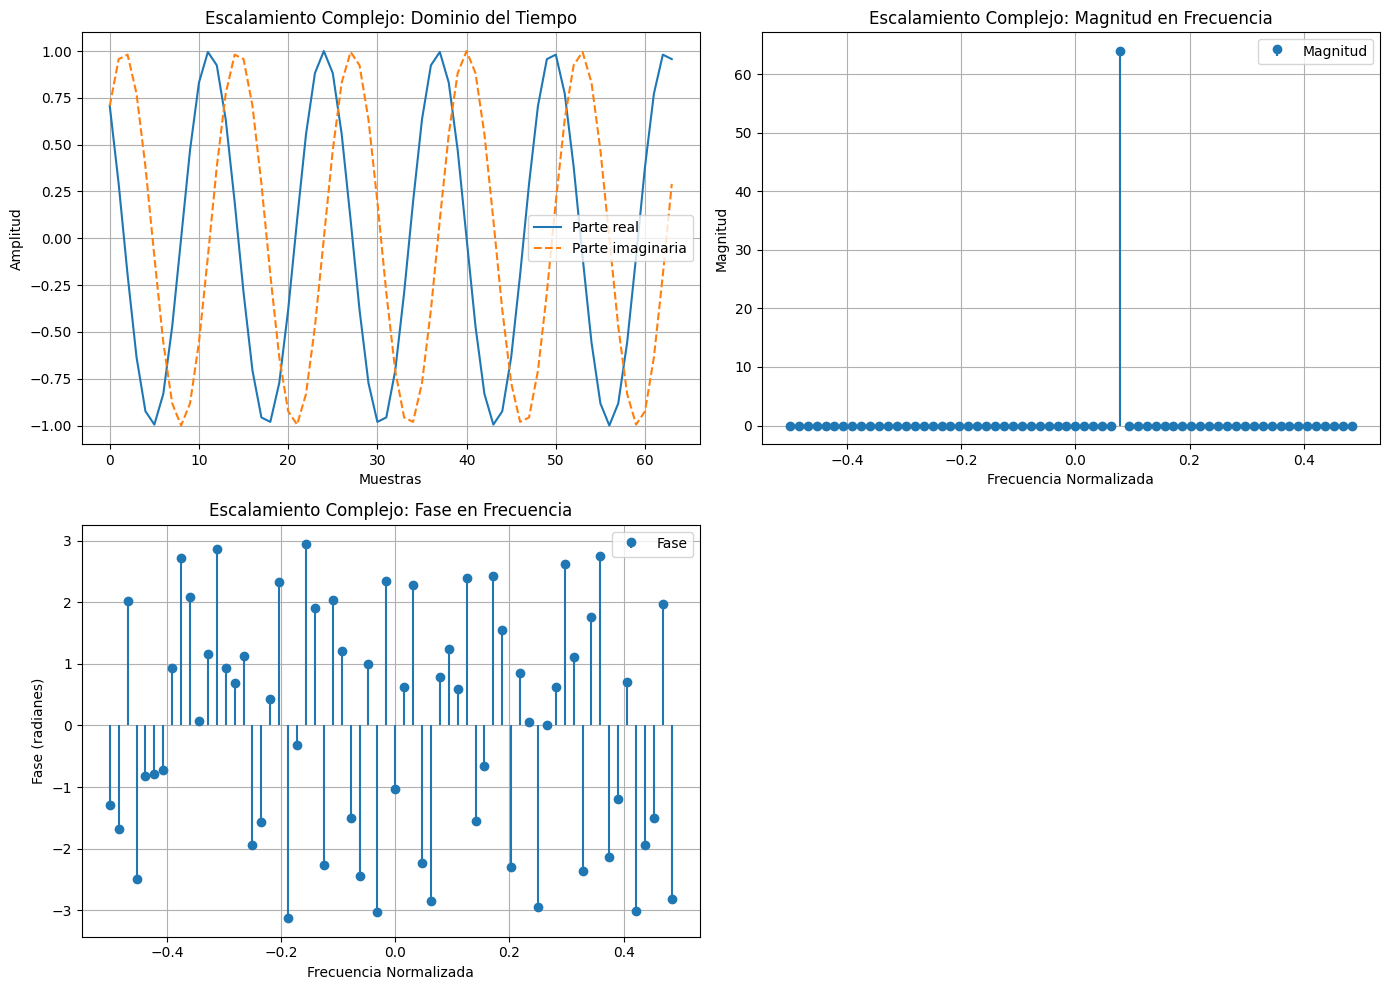

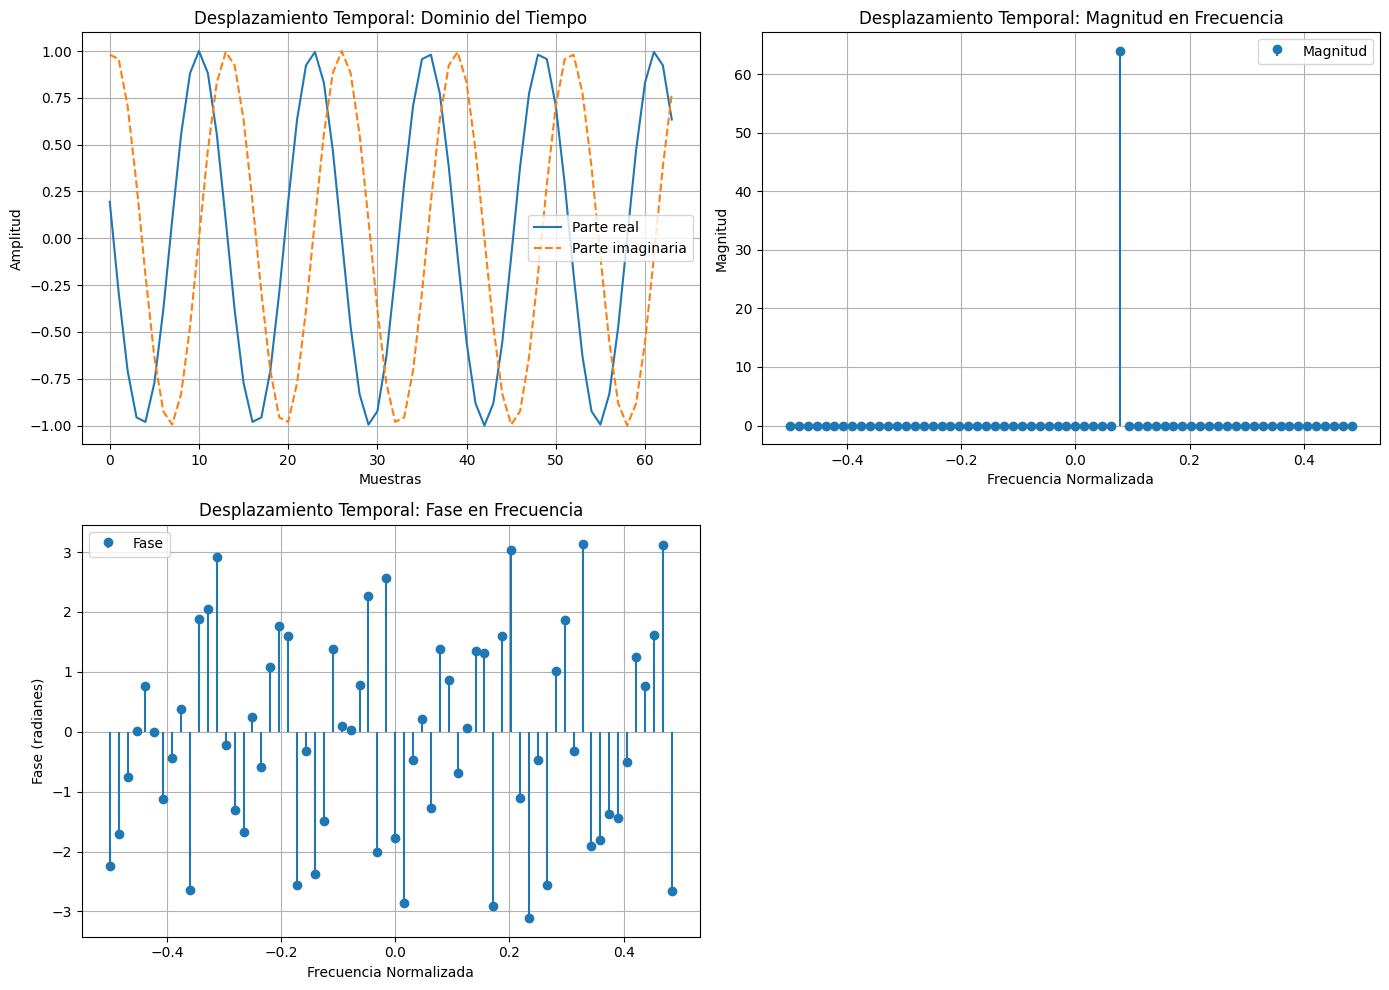

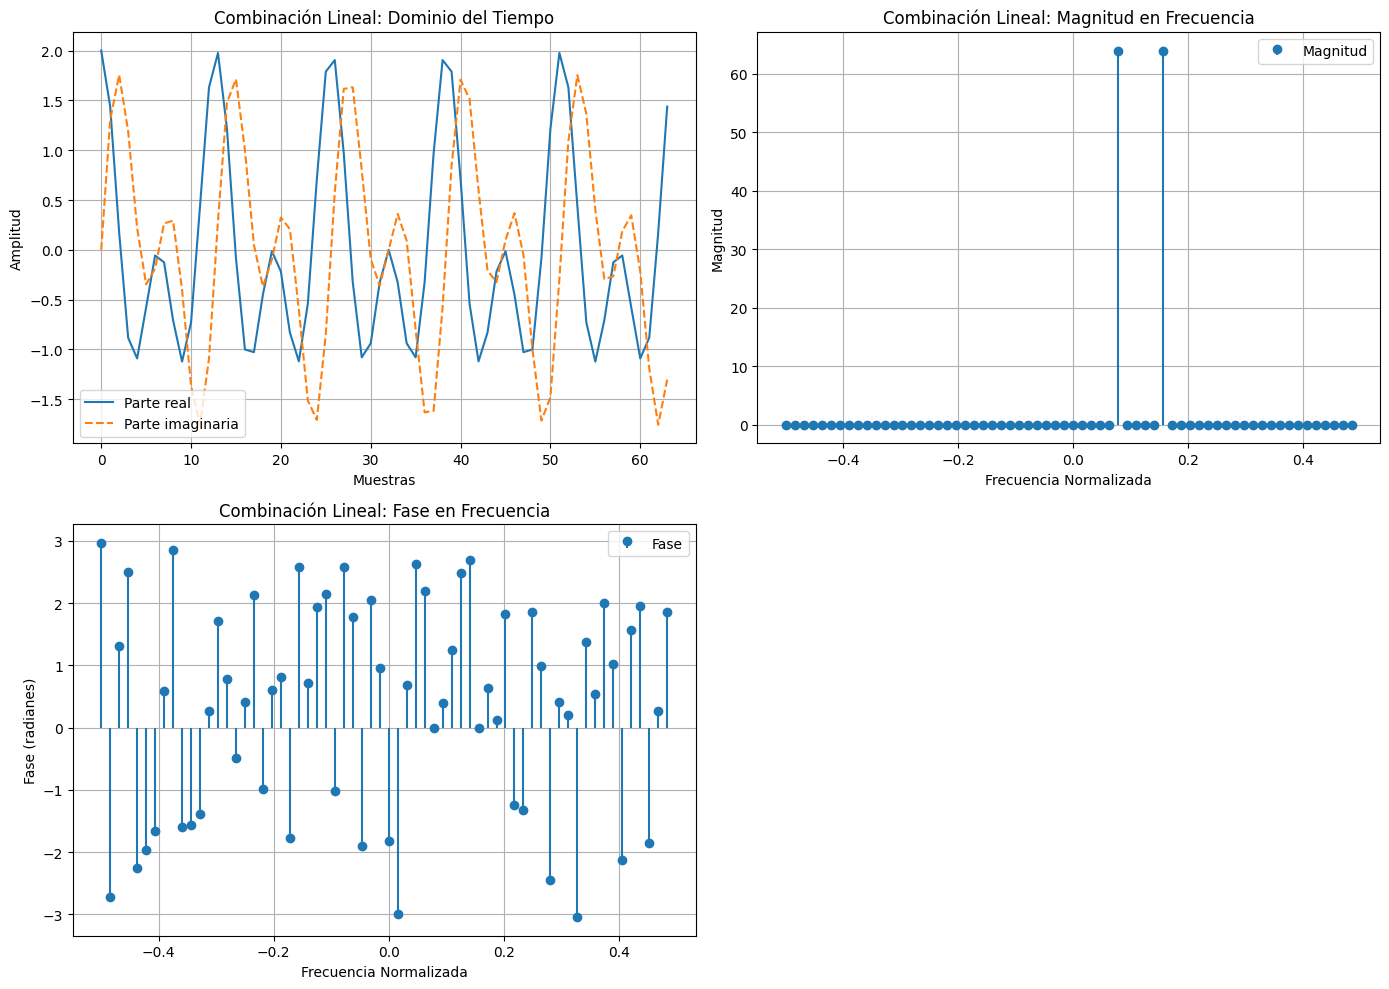

In [25]:
# Graficar resultados
plot_complex_operations(original_signal, original_fft, title="Señal Original")
plot_complex_operations(conjugated_signal, conjugated_fft, title="Conjugado")
plot_complex_operations(scaled_signal, scaled_fft, title="Escalamiento Complejo")
plot_complex_operations(shifted_signal, shifted_fft, title="Desplazamiento Temporal")
plot_complex_operations(combined_signal, combined_fft, title="Combinación Lineal")


### Grafica del solenoide en el plano complejo
